# **Истражување на влијанието на дизајнот на Reward функција врз перформансите на засилен агент во CityLearn**


Овој проект истражува како дизајнот на reward функцијата влијае врз учењето и перформансите на централизираниот засилен агент во симулациската околина CityLearn. Се користи архитектура базирана на PPO алгоритам во комбинација со LSTM и GNN, при што графот се ажурира динамички за секој епизоден почеток. Агентот се тренира со две различни reward функции – едноставна и комплексна. Целта е да се процени влијанието на секоја функција врз стабилноста на учењето, финалниот reward и генерализациската способност на агентот на непознати згради.


## Инсталација на зависности


In [ ]:
!pip install citylearn==2.3.0
!pip uninstall -y gym
!pip install gymnasium==0.29.1
!pip install stable-baselines3[extra]==2.2.1

# Torch + CUDA 11.8
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# PyTorch Geometric
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric

# Fix NumPy / SciPy / TensorBoard / TensorFlow
!pip install numpy==1.24.4 scipy==1.10.1
!pip install tensorboard==2.12.3
!pip install tensorflow==2.12.0

# Restart runtime
import os
os.kill(os.getpid(), 9)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 129.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Successfully uninstalled gym-0.25.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.2.0
    Uninstalling gymnasium-1.2.0:
      Successfully uninstalled gymnasium-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, which is not installed.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

Looking in indexes: https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 89.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.7 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.12.3 which is incompatible.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still l

## Средина: CityLearn
CityLearn е симулациска околина за паметни згради. Секој агент одлучува колку енергија да складира или искористи од батеријата со цел да се минимизира потрошувачката и да се балансира мрежата.


# **PPO агент со CustomReward function**

###  Custom Reward Function 1: Енергетска ефикасност и економија

Оваа функција има за цел да го научи агентот да управува со енергијата на паметен начин:  
- Намалување на потрошувачката од мрежата (особено кога струјата е скапа)  
- Поголема искористеност на соларната енергија  
- Стратегиско користење на батеријата според цените  
- Казнување на неефикасни состојби (празна/преполна батерија, лошо темпирање)

Секој аспект е дизајниран да го насочи агентот кон одржливо и оптимално однесување.


In [1]:
from citylearn.reward_function import RewardFunction

class CustomReward(RewardFunction):
    def __init__(self, env_metadata):
        super().__init__(env_metadata)

    def calculate(self, observations):
        rewards_per_building = []
        for o in observations:
            net_electricity_consumption = o.get('net_electricity_consumption', 0.0)
            solar_generation = o.get('solar_generation', 0.0)
            battery_soc = o.get('electrical_storage_soc', 0.5)
            electricity_price = o.get('electricity_pricing', 0.0)

            # =======================================================
            # 1. Минимизирање на нето-потрошувачка (пресметана со цена)
            # =======================================================
            # Награда е негативна вредност на потрошената енергија.
            # Ова го поттикнува да купува помалку струја, особено кога е скапа.
            # Многу позитивно ако продаваш струја на мрежата (net_electricity_consumption < 0)
            reward = -1.0 * net_electricity_consumption * electricity_price

            # =======================================================
            # 2. Искористување на соларна енергија
            # =======================================================
            # Позитивна награда за генерирање соларна енергија.
            # Можеби не директно *solar_generation*, туку колку таа помогнала
            # да се намали купувањето или да се полни батеријата.
            # Засега, едноставна позитивна вредност.
            reward += 0.2 * solar_generation

            # =======================================================
            # 3. Управување со батеријата (со оглед на цената)
            # =======================================================
            # а) Казна за празна батерија кога потрошувачката е висока
            if net_electricity_consumption > 0 and battery_soc < 0.1:
                reward -= 0.5

            # б) Казна за преполна батерија кога има соларна генерација И ниска потрошувачка
            # Ова го охрабрува да ја празни за да направи место за соларна.
            if battery_soc > 0.9 and net_electricity_consumption < 0.1 and solar_generation > 0.1:
                reward -= 0.3

            #  в) Награда за полнење кога цената е ниска (купувај евтино)
            # Ова претпоставува дека ниска цена е < 0.1 (пример).
            # Прилагоди го прагот според реалните цени во твојата симулација.
            # Ако агентот одлучил да купи струја (акција > 0, т.е. полни батерија)
            # и цената е ниска.
            if electricity_price < 0.1 and o.get('charging_rate', 0.0) > 0: # Додавање на 'charging_rate' ако е достапно
                reward += 0.1 # Мал поттик за евтино полнење

            #  г) Награда за празнење кога цената е висока (продавај или користи скапо складирана енергија)
            # Ако агентот одлучил да празни (акција < 0, т.е. празни батерија)
            # и цената е висока.
            if electricity_price > 0.5 and o.get('discharging_rate', 0.0) > 0:
                reward += 0.1

            # д) Мала казна за отстапување од средина (сеуште корисно)
            reward -= 0.05 * abs(battery_soc - 0.5)

            rewards_per_building.append(np.clip(reward, -20.0, 20.0))

        return rewards_per_building

###  Тренирање на PPO + LSTM + GNN агент со динамичен граф

Овој дел го иницијализира и тренира агентот користејќи:
- **PPO алгоритам** со LSTM меморија за секвенцијално учење
- **GNN (Graph Neural Network)** за искористување на информации од други слични згради
- **Dynamic Graph**: графот се ажурира пред секој чекор за да се одразат најновите енергетски карактеристики
- **Custom Reward Function** дефинирана претходно за да се поттикне енергетска ефикасност

Се тренира агент само за една зграда (централизиран PPO) со временски контекст (12 чекори).  
Се користи и `EvalCallback` за редовна евалуација и зачувување на најдобриот модел.


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.nn import GATv2Conv
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from stable_baselines3.common.monitor import Monitor
from gymnasium import Env, spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import RewardFunction


# ========== Dynamic Graph Builder ==========
def build_dynamic_graph(env, k=2):
    n = len(env.buildings)
    feats = []
    for b in env.buildings:
        feats.append([
            b.net_electricity_consumption[-1],
            b.solar_generation[-1],
            b.electrical_storage.soc[-1]
        ])
    features = np.array(feats)
    features = StandardScaler().fit_transform(features)
    dists = euclidean_distances(features)

    edge_index, edge_attr = [], []
    for i in range(n):
        nearest = np.argsort(dists[i])[1:k+1]
        for j in nearest:
            weight = 1.0 / (dists[i][j] + 1e-6)
            edge_index += [[i, j], [j, i]]
            edge_attr += [[weight], [weight]]

    return (
        torch.tensor(features, dtype=torch.float32),
        torch.tensor(edge_index).T.long(),
        torch.tensor(edge_attr).float()
    )

# ========== Env Wrapper ==========
class CityLearnSingleBuildingWrapper(Env):
    def __init__(self, env, building_id=0, seq_len=12):
        super().__init__()
        self.env = env
        self.building_id = building_id
        self.seq_len = seq_len
        self.n_buildings = len(env.action_space)
        self.obs_dim = env.observation_space[building_id].shape[0]
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(seq_len * self.obs_dim,), dtype=np.float32)
        self.buffer = []

    def reset(self, **kwargs):
        obs, _ = self.env.reset(**kwargs)
        self.buffer = []
        o = obs[self.building_id]
        for _ in range(self.seq_len):
            self.buffer.append(o)
        return np.concatenate(self.buffer), {}

    def step(self, action):
        actions = [[0.0] * self.env.action_space[0].shape[0] for _ in range(self.n_buildings)]
        actions[self.building_id] = [float(action[0])]
        obs, reward, done, trunc, info = self.env.step(actions)
        o = obs[self.building_id]
        self.buffer.pop(0)
        self.buffer.append(o)
        return np.concatenate(self.buffer), reward[self.building_id], done, trunc, info

# ========== Feature Extractor ==========
class GNN_LSTM_FeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, env, hidden_size=64, lstm_layers=1):
        super().__init__(observation_space, features_dim=hidden_size)
        self.hidden_size = hidden_size
        self.obs_dim = observation_space.shape[0] // 12
        self.lstm = nn.LSTM(self.obs_dim, hidden_size, lstm_layers, batch_first=True)
        self.hidden = None
        self.env = env
        self.building_id = env.building_id if hasattr(env, 'building_id') else 0
        self.graph_x = torch.zeros((len(env.buildings), 3), dtype=torch.float32)
        self.edge_index = torch.empty((2, 0), dtype=torch.long)
        self.edge_attr = torch.empty((0, 1), dtype=torch.float32)
        self.gnn1 = GATv2Conv(3, hidden_size, edge_dim=1)
        self.gnn2 = GATv2Conv(hidden_size, hidden_size, edge_dim=1)

    def update_graph(self):
        graph_x, edge_index, edge_attr = build_dynamic_graph(self.env)
        self.graph_x = graph_x
        self.edge_index = edge_index
        self.edge_attr = edge_attr

    def forward(self, obs):
        batch_size = obs.shape[0]
        x = obs.view(batch_size, 12, self.obs_dim).float()
        if self.hidden is None or self.hidden[0].shape[1] != batch_size:
            h0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            c0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            self.hidden = (h0, c0)
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        self.hidden = (self.hidden[0].detach(), self.hidden[1].detach())
        lstm_feature = lstm_out[:, -1, :]

        gx = self.graph_x.to(x.device)
        ei = self.edge_index.to(x.device)
        ea = self.edge_attr.to(x.device)
        gx = torch.relu(self.gnn1(gx, ei, ea))
        gx = torch.relu(self.gnn2(gx, ei, ea))


        gnn_feature = gx[self.building_id].unsqueeze(0).expand(batch_size, -1)

        return lstm_feature + gnn_feature

# ========== Policy ==========
class CustomGNNLSTMPolicy(ActorCriticPolicy):
    def __init__(self, observation_space, action_space, lr_schedule, env, **kwargs):
        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            features_extractor_class=GNN_LSTM_FeatureExtractor,
            features_extractor_kwargs={"env": env},
            **kwargs
        )

# ========== Callback ==========
class DynamicGraphCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)

    def _on_step(self) -> bool:
        self.model.policy.features_extractor.update_graph()
        return True

# ========== Main ==========
if __name__ == '__main__':
    env = CityLearnEnv(
        schema='citylearn_challenge_2022_phase_1',
        reward_function=CustomReward,
        central_agent=False
    )

    single_building_env = CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12)
    vec_env = DummyVecEnv([lambda: single_building_env])

    model = PPO(
        CustomGNNLSTMPolicy,
        vec_env,
        normalize_advantage=True,
        verbose=1,
        n_steps=1024,
        batch_size=64,
        learning_rate=3e-4,
        gamma=0.99,
        gae_lambda=0.95,
        ent_coef=0.01,
        vf_coef=0.4,
        max_grad_norm=0.5,
        policy_kwargs={"env": env}
    )

    model.policy.features_extractor.update_graph()

    eval_env = DummyVecEnv([
        lambda: Monitor(CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12))
    ])
    eval_callback = EvalCallback(
        eval_env,
        best_model_save_path="./logs/best_model",
        log_path="./logs/eval",
        eval_freq=1024,
        deterministic=True,
        render=False
    )

    model.learn(total_timesteps=500_000, callback=[DynamicGraphCallback(), eval_callback])
    model.save("ppo_gnn_lstm_dynamic_graph")


Using cpu device
Eval num_timesteps=1024, episode_reward=-2936.11 +/- 0.00
Episode length: 8759.00 +/- 0.00
----------------------------------
| eval/              |           |
|    mean_ep_length  | 8.76e+03  |
|    mean_reward     | -2.94e+03 |
| time/              |           |
|    total_timesteps | 1024      |
----------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 1    |
|    iterations      | 1    |
|    time_elapsed    | 696  |
|    total_timesteps | 1024 |
-----------------------------
Eval num_timesteps=2048, episode_reward=-993.82 +/- 0.20
Episode length: 8759.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 8.76e+03     |
|    mean_reward          | -994         |
| time/                   |              |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl          

KeyboardInterrupt: 

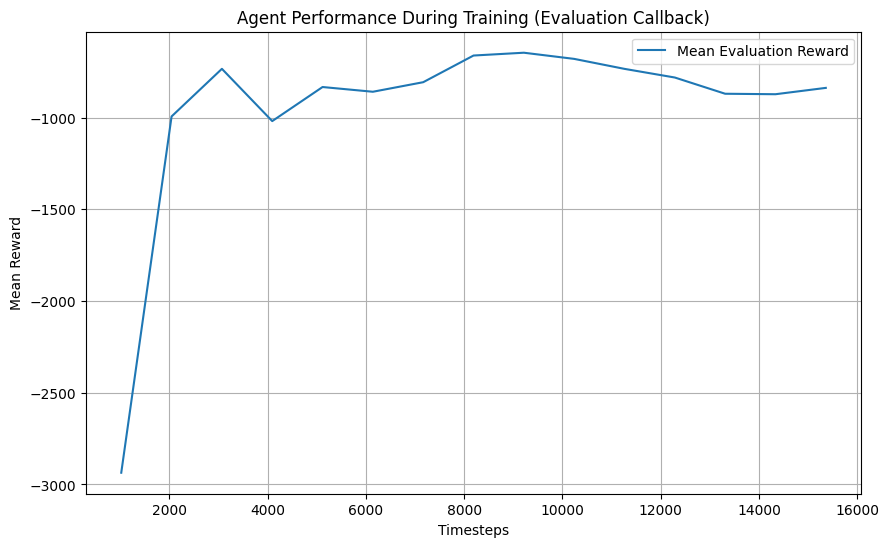

✅ Loaded 15 evaluation points.
First 5 timesteps: [1024 2048 3072 4096 5120]
First 5 mean rewards: [-2936.1099152  -993.8173378  -734.2564848 -1019.1838616  -833.432332 ]
Shape of 'results' array: (15, 5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os


eval_data_path = '/content/logs/eval/evaluations_CustomReward.npz'

try:

    data = np.load(eval_data_path)

    timesteps = data['timesteps']
    results = data['results']

    mean_rewards = np.mean(results, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, mean_rewards, label='Mean Evaluation Reward')
    plt.title('Agent Performance During Training (Evaluation Callback)')
    plt.xlabel('Timesteps')
    plt.ylabel('Mean Reward')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"✅ Loaded {len(timesteps)} evaluation points.")
    print(f"First 5 timesteps: {timesteps[:5]}")
    print(f"First 5 mean rewards: {mean_rewards[:5]}")
    print(f"Shape of 'results' array: {results.shape}")

except FileNotFoundError:
    print(f"❌ Error: evaluations.npz not found at {eval_data_path}")
    print("Please ensure the path is correct and the EvalCallback was configured to save this file.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")
    print(f"Keys available in npz: {list(data.keys())}")


### 📈 Графикон: Просечна награда за време на тренирање

Овој графикон ја прикажува промената на **просечната евалуациска награда** на агентот во текот на тренирањето, мерена на секои 1024 чекори. Агентот покажува брзо подобрување во првите епизоди, достигнувајќи стабилно ниво на награда по околу 8000 чекори. Ова укажува дека политиката успешно научила ефективна стратегија во рана фаза од тренингот и продолжува со доследна изведба.


### 🧪 Евалуација на агентот на други згради

Откако PPO агентот беше трениран исклучиво на зграда 0, се изврши евалуација на останатите згради (2, 3, 4 и 5) од истата околина.  
Целта на оваа анализа е да се провери колку научената политика може да се пренесе и на други згради со различна динамика и потрошувачка на енергија.


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 2
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")


📊 Total reward on unseen building 2: -138.24


In [7]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 4
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 4: -579.69


In [10]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 1
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 1: -903.35


In [11]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 3
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 3: -625.10


| Зграда | Вкупна Награда |
| ------ | -------------- |
| 2      | -138.24        |
| 3      | -625.10        |
| 4      | -579.69        |
| 1      | -903.35        |

Иако агентот е трениран само на зграда 0, тој покажува релативно добра генерализација при пренос на политика на зграда 2 (награда: -138.24), што може да значи дека таа зграда има сличен шаблон на потрошувачка. Наспроти тоа, значително полоши перформанси се забележани на зграда 5 (-903.35), што може да укажува на различна динамика која агентот не ја научил при тренинг.

Ова покажува дека тренингот на една зграда може да даде ограничени резултати на останатите, и потенцијално сугерира потреба од:
- тренинг со централен агент на повеќе згради
- дополнителна фина адаптација (fine-tuning)
- подобра генерализирачка архитектура и reward функција



# **PPO агент со SimpleReward function**

###  SimpleReward: Поедноставена наградна функција

Оваа наградна функција е дизајнирана со цел да се користи **поедноставен сигнал** за учење, без директна интеграција на електричната цена во пресметките. Таа го поттикнува агентот:

- Да **намали потрошувачка на енергија од мрежата**
- Да **искористи соларна енергија** кога е достапна
- Да **управува со батеријата** без премногу сложени сценарија (на пр., не се користи цена)
- Да **одржува баланс** на состојбата на батеријата околу 50%

Овој reward е добар за споредба со покомплексната функција бидејќи покажува како влијае богатството на наградниот сигнал врз процесот на учење на агентот.


In [ ]:
from citylearn.reward_function import RewardFunction

# ========== Custom Reward ==========
class SimpleReward(RewardFunction):
    def __init__(self, env_metadata):
        super().__init__(env_metadata)

    def calculate(self, observations):
        rewards_per_building = []
        for o in observations:
            net_electricity_consumption = o.get('net_electricity_consumption', 0.0)
            solar_generation = o.get('solar_generation', 0.0)
            battery_soc = o.get('electrical_storage_soc', 0.5)

            # =======================================================
            # 1. Минимизирање на нето-потрошувачка
            # =======================================================
            # Главната цел е да се минимизира купената електрична енергија.
            # Оваа негативна награда го поттикнува агентот да користи помалку
            # струја од мрежата или да произведува повеќе од неа.
            # Ако агентот продава струја (net_electricity_consumption < 0), наградата станува позитивна.
            reward = -1.0 * net_electricity_consumption

            # =======================================================
            # 2. Искористување на соларна енергија
            # =======================================================
            # Позитивна награда за генерирање соларна енергија.
            # Ова го охрабрува агентот да ги цени и искористи моментите кога
            # соларните панели произведуваат енергија.
            reward += 0.2 * solar_generation

            # =======================================================
            # 3. Управување со батеријата
            # =======================================================
            # а) Казна за празна батерија кога има потреба од енергија
            # Ако потрошувачката е позитивна (купуваш струја), а батеријата е речиси празна,
            # тоа значи дека агентот не успеал да ја искористи складираната енергија кога му била најпотребна.
            if net_electricity_consumption > 0 and battery_soc < 0.1:
                reward -= 0.5

            # б) Казна за преполна батерија кога има соларна енергија
            # Ова го поттикнува агентот да ја празни батеријата (да ја користи или продава струјата)
            # за да направи место за новата соларна енергија, која инаку би била изгубена.
            if battery_soc > 0.9 and net_electricity_consumption < 0.1 and solar_generation > 0.1:
                reward -= 0.3

            # в) Награда за полнење кога има доволно простор во батеријата и потрошувачката е висока
            # Ова е мал поттик да се искористи батеријата за да се задоволат
            # потребите на зградата кога тие се високи.
            if net_electricity_consumption > 0.5 and battery_soc > 0.2:
                reward += 0.1 * (battery_soc - 0.2)

            # г) Мала казна за отстапување од идеална состојба на батеријата
            # Ова го насочува агентот да се обиде да ја одржи батеријата околу 50%
            # (не премногу полна, ниту премногу празна), што обезбедува флексибилност
            # и за полнење и за празнење во иднина.
            reward -= 0.05 * abs(battery_soc - 0.5)

            rewards_per_building.append(np.clip(reward, -20.0, 20.0))
        return rewards_per_building

###  Тренирање на PPO агентот со GNN + LSTM и поедноставена наградна функција

Во овој дел, се тренира PPO агент кој користи комбинација од:

- **LSTM**: за обработка на секвенцијални податоци (12-часовна историја на опсервации)
- **GNN (Graph Neural Network)**: за искористување на сличноста помеѓу згради преку динамички ажурирана граф структура
- **Поедноставена наградна функција (SimpleReward)**: која не го зема предвид цената на струјата, туку се фокусира на нето потрошувачка, соларна генерација и управување со батеријата.

Тренирањето се врши на една конкретна зграда (зграда 0), додека графот се ажурира на секој чекор со цел да го рефлектира моменталното сличностно однесување на зградите. Тренирањето се изведува во текот на **500,000 чекори**, а на секои **1024 чекори се врши евалуација**.

Моделот се зачувува по завршување на тренирањето, а исто така се чуваат и најдобрите тежини според евалуација.


In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.nn import GATv2Conv
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from stable_baselines3.common.monitor import Monitor
from gymnasium import Env, spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import RewardFunction

# ========== Custom Reward ==========
class SimpleReward(RewardFunction):
     def __init__(self, env_metadata):
         super().__init__(env_metadata)

     def calculate(self, observations):
         rewards_per_building = []
         for o in observations:
             net_electricity_consumption = o.get('net_electricity_consumption', 0.0)
             solar_generation = o.get('solar_generation', 0.0)
             battery_soc = o.get('electrical_storage_soc', 0.5)

             reward = -1.0 * net_electricity_consumption
             reward += 0.2 * solar_generation

             if net_electricity_consumption > 0 and battery_soc < 0.1:
                 reward -= 0.5

             if battery_soc > 0.9 and net_electricity_consumption < 0.1 and solar_generation > 0.1:
                 reward -= 0.3

             if net_electricity_consumption > 0.5 and battery_soc > 0.2:
                 reward += 0.1 * (battery_soc - 0.2)

             reward -= 0.05 * abs(battery_soc - 0.5)

             rewards_per_building.append(np.clip(reward, -20.0, 20.0))
         return rewards_per_building

# ========== Dynamic Graph Builder ==========
def build_dynamic_graph(env, k=2):
    n = len(env.buildings)
    feats = []
    for b in env.buildings:
        feats.append([
            b.net_electricity_consumption[-1],
            b.solar_generation[-1],
            b.electrical_storage.soc[-1]
        ])
    features = np.array(feats)
    features = StandardScaler().fit_transform(features)
    dists = euclidean_distances(features)

    edge_index, edge_attr = [], []
    for i in range(n):
        nearest = np.argsort(dists[i])[1:k+1]
        for j in nearest:
            weight = 1.0 / (dists[i][j] + 1e-6)
            edge_index += [[i, j], [j, i]]
            edge_attr += [[weight], [weight]]

    return (
        torch.tensor(features, dtype=torch.float32),
        torch.tensor(edge_index).T.long(),
        torch.tensor(edge_attr).float()
    )

# ========== Env Wrapper ==========
class CityLearnSingleBuildingWrapper(Env):
    def __init__(self, env, building_id=0, seq_len=12):
        super().__init__()
        self.env = env
        self.building_id = building_id
        self.seq_len = seq_len
        self.n_buildings = len(env.action_space)
        self.obs_dim = env.observation_space[building_id].shape[0]
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(seq_len * self.obs_dim,), dtype=np.float32)
        self.buffer = []

    def reset(self, **kwargs):
        obs, _ = self.env.reset(**kwargs)
        self.buffer = []
        o = obs[self.building_id]
        for _ in range(self.seq_len):
            self.buffer.append(o)
        return np.concatenate(self.buffer), {}

    def step(self, action):
        actions = [[0.0] * self.env.action_space[0].shape[0] for _ in range(self.n_buildings)]
        actions[self.building_id] = [float(action[0])]
        obs, reward, done, trunc, info = self.env.step(actions)
        o = obs[self.building_id]
        self.buffer.pop(0)
        self.buffer.append(o)
        return np.concatenate(self.buffer), reward[self.building_id], done, trunc, info

# ========== Feature Extractor ==========
class GNN_LSTM_FeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, env, hidden_size=64, lstm_layers=1):
        super().__init__(observation_space, features_dim=hidden_size)
        self.hidden_size = hidden_size
        self.obs_dim = observation_space.shape[0] // 12
        self.lstm = nn.LSTM(self.obs_dim, hidden_size, lstm_layers, batch_first=True)
        self.hidden = None
        self.env = env
        self.building_id = env.building_id if hasattr(env, 'building_id') else 0
        self.graph_x = torch.zeros((len(env.buildings), 3), dtype=torch.float32)
        self.edge_index = torch.empty((2, 0), dtype=torch.long)
        self.edge_attr = torch.empty((0, 1), dtype=torch.float32)
        self.gnn1 = GATv2Conv(3, hidden_size, edge_dim=1)
        self.gnn2 = GATv2Conv(hidden_size, hidden_size, edge_dim=1)

    def update_graph(self):
        graph_x, edge_index, edge_attr = build_dynamic_graph(self.env)
        self.graph_x = graph_x
        self.edge_index = edge_index
        self.edge_attr = edge_attr

    def forward(self, obs):
        batch_size = obs.shape[0]
        x = obs.view(batch_size, 12, self.obs_dim).float()
        if self.hidden is None or self.hidden[0].shape[1] != batch_size:
            h0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            c0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            self.hidden = (h0, c0)
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        self.hidden = (self.hidden[0].detach(), self.hidden[1].detach())
        lstm_feature = lstm_out[:, -1, :]

        gx = self.graph_x.to(x.device)
        ei = self.edge_index.to(x.device)
        ea = self.edge_attr.to(x.device)
        gx = torch.relu(self.gnn1(gx, ei, ea))
        gx = torch.relu(self.gnn2(gx, ei, ea))


        gnn_feature = gx[self.building_id].unsqueeze(0).expand(batch_size, -1)

        return lstm_feature + gnn_feature

# ========== Policy ==========
class CustomGNNLSTMPolicy(ActorCriticPolicy):
    def __init__(self, observation_space, action_space, lr_schedule, env, **kwargs):
        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            features_extractor_class=GNN_LSTM_FeatureExtractor,
            features_extractor_kwargs={"env": env},
            **kwargs
        )

# ========== Callback ==========
class DynamicGraphCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)

    def _on_step(self) -> bool:
        self.model.policy.features_extractor.update_graph()
        return True

# ========== Main ==========
if __name__ == '__main__':
    env = CityLearnEnv(
        schema='citylearn_challenge_2022_phase_1',
        reward_function=SimpleReward,
        central_agent=False
    )

    single_building_env = CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12)
    vec_env = DummyVecEnv([lambda: single_building_env])

    model = PPO(
        CustomGNNLSTMPolicy,
        vec_env,
        normalize_advantage=True,
        verbose=1,
        n_steps=1024,
        batch_size=64,
        learning_rate=3e-4,
        gamma=0.99,
        gae_lambda=0.95,
        ent_coef=0.01,
        vf_coef=0.4,
        max_grad_norm=0.5,
        policy_kwargs={"env": env}
    )

    model.policy.features_extractor.update_graph()

    eval_env = DummyVecEnv([
        lambda: Monitor(CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12))
    ])
    eval_callback = EvalCallback(
        eval_env,
        best_model_save_path="./logs/best_model",
        log_path="./logs/eval",
        eval_freq=1024,
        deterministic=True,
        render=False
    )

    model.learn(total_timesteps=500_000, callback=[DynamicGraphCallback(), eval_callback])
    model.save("ppo_gnn_lstm_dynamic_graph")


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
INFO:root:The dataset names DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/dataset_names.json. Next time DataSet.get_dataset_names is called, it will read from cache unless DataSet.clear

Using cuda device
Eval num_timesteps=1024, episode_reward=-2451.72 +/- 0.11
Episode length: 8759.00 +/- 0.00
----------------------------------
| eval/              |           |
|    mean_ep_length  | 8.76e+03  |
|    mean_reward     | -2.45e+03 |
| time/              |           |
|    total_timesteps | 1024      |
----------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 1    |
|    iterations      | 1    |
|    time_elapsed    | 612  |
|    total_timesteps | 1024 |
-----------------------------
Eval num_timesteps=2048, episode_reward=-2587.94 +/- 0.43
Episode length: 8759.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 8.76e+03     |
|    mean_reward          | -2.59e+03    |
| time/                   |              |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl        

KeyboardInterrupt: 

## 🧪 Анализа на тренинг логовите (SimpleReward агент)

Следи табела со селектирани метрики од логовите:

| Timesteps | Mean Reward | Entropy Loss | Value Loss | Policy Grad Loss | Explained Variance |
|-----------|-------------|---------------|-------------|------------------|---------------------|
| 1024      | -2451.72    | -1.42         | 94.5        | -0.0010          | 0.0009              |
| 3072      | -2585.43    | -1.43         | 109         | -0.0030          | 0.0792              |
| 5120      | -2585.55    | -1.42         | 98.3        | -0.0013          | 0.0088              |
| 7168      | -2139.55 ✅ | -1.41         | 82.5        | -0.0033          | 0.0556              |
| 9216      | -2664.54 🔻 | -1.38         | 74.7        | -0.0047          | 0.109               |
| 10240     | -3791.63 ❌ | -1.38         | 66.9        | -0.0046          | 0.114               |
| 12288     | -2737.80    | -1.38         | 66.6        | -0.0032          | 0.162               |
| 14336     | -2803.91    | -1.39         | 63.1        | -0.0029          | 0.222               |
| 15360     | -2540.67    | -1.39         | 62.1        | -0.0009          | 0.233               |

### ✅ Заклучоци:
- **Entropy Loss** опаѓа: агентот станува посигурен во изборите.
- **Mean Reward** прво се подобрува, потоа има пад околу 10240 чекори, но на крај повторно расте.
- **Explained Variance** расте: value мрежата станува попрецизна.
- **Policy Gradient Loss** е најголем во средина на тренингот, што укажува на најголеми промени во политика.

Тренингот има нестабилен reward тренд, но стабилни подобрувања во мрежите. Агентот покажува способност да се опорави по лош reward.


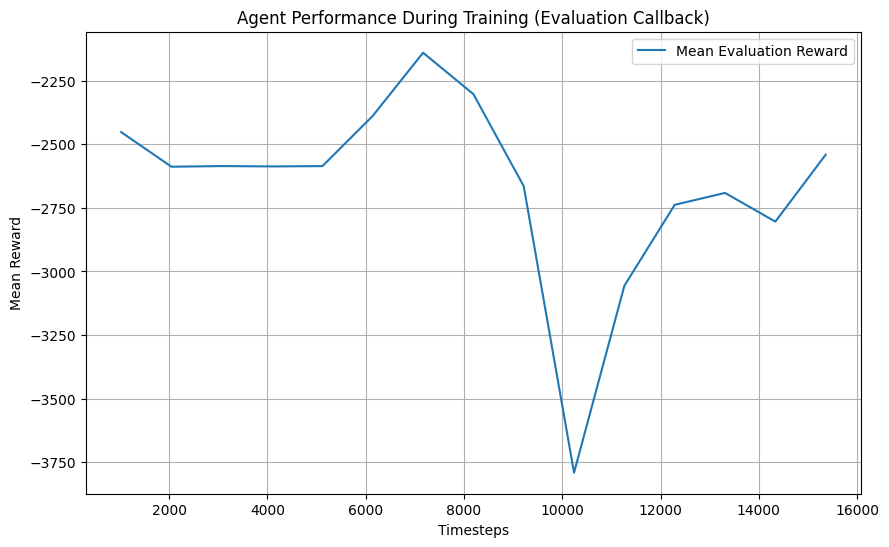

✅ Loaded 15 evaluation points.
First 5 timesteps: [1024 2048 3072 4096 5120]
First 5 mean rewards: [-2451.7235226 -2587.9446404 -2585.4262848 -2586.8060212 -2585.5498926]
Shape of 'results' array: (15, 5)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


eval_data_path = '/content/logs/eval/evaluations_SimpleReward.npz'

try:

    data = np.load(eval_data_path)


    timesteps = data['timesteps']
    results = data['results']


    mean_rewards = np.mean(results, axis=1)




    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, mean_rewards, label='Mean Evaluation Reward')
    plt.title('Agent Performance During Training (Evaluation Callback)')
    plt.xlabel('Timesteps')
    plt.ylabel('Mean Reward')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"✅ Loaded {len(timesteps)} evaluation points.")
    print(f"First 5 timesteps: {timesteps[:5]}")
    print(f"First 5 mean rewards: {mean_rewards[:5]}")
    print(f"Shape of 'results' array: {results.shape}")

except FileNotFoundError:
    print(f"❌ Error: evaluations.npz not found at {eval_data_path}")
    print("Please ensure the path is correct and the EvalCallback was configured to save this file.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")
    print(f"Keys available in npz: {list(data.keys())}")

### 📉 Графикон: Просечна награда за време на тренирање (SimpleReward)

Овој графикон ја прикажува евалуациската награда за време на тренирањето на агентот кој користи поедноставена наградна функција. Забележливо е:

- ✅ Почетна **стабилност**, со релативно мали осцилации до околу 7000 чекори.
- 📈 Постепено подобрување со пик околу 7500 чекори (најдобра награда во тој период).
- ⚠️ Потоа следи **нагло влошување** помеѓу 8500 и 10500 чекори, каде што наградата паѓа до најниската вредност.
- 🔁 Во втората половина од тренирањето, агентот успева да се **опорави**, но не го достигнува претходниот максимум.

🔍 Оваа динамика укажува дека **агентот е нестабилен при учење**, можеби поради:
- Недоволен баланс на компонентите во наградната функција.
- Непредвидливи однесувања кои не се санкционираат доволно.
- Премногу „прости“ насоки за учење, што води до нагли осцилации.

➡️ Во споредба со првиот reward, **овој пристап изгледа помалку стабилен и помалку ефикасен во преносливото учење**. Можеби ќе биде потребно дополнително фино подесување или комбинирање на оваа функција со други компоненти (цена, стабилност, удобност).


##  Тестирање на преносливост на агентот на нови згради

Во следните неколку чекори се извршува евалуација на PPO агентот, трениран без GNN, на згради кои не биле дел од процесот на тренинг.

За секоја зграда:
- Се иницијализира нова средина со **CityLearnSingleBuildingWrapper**, која го изолира однесувањето само за избраната зграда.
- Агентот е вчитан од `best_model_without_GNN_400.zip`.
- Се извршува една епизода на симулација во која агентот носи детерминирани одлуки (`deterministic=True`).
- Вкупната награда добиена од епизодата се собира во `total_reward` и се прикажува.

### 🎯 Цел:
Да се процени **генерализацијата** и **преносливоста** на агентот кој бил трениран на една зграда, кон **други згради со различна потрошувачка, капацитет на батерии и соларна продукција**.

Оваа анализа е клучна за да се утврди:
- дали агентот научил општа стратегија, или
- дали е приспособен исклучиво на карактеристиките на зградата на која бил трениран.

Овој дел е особено важен за **споредба со GNN агентот**, кај кого информацијата од мрежата на згради (граф) би требало да го подобри преносот кон други згради.

In [3]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=SimpleReward,
    central_agent=False
)

test_building_id = 2  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_SimpleReward.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 2: -510.71


In [4]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=SimpleReward,
    central_agent=False
)

test_building_id = 4  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_SimpleReward.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 4: -1775.88


In [5]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=SimpleReward,
    central_agent=False
)

test_building_id = 1  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_SimpleReward.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 1: -3076.81


In [6]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=SimpleReward,
    central_agent=False
)

test_building_id = 3  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_SimpleReward.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 3: -3660.65


## 📊 Споредба на агенти со различни Reward Functions

Откако беа тренирани два PPO агенти со иста архитектура (вклучувајќи GNN и LSTM), но со различни функции за награда (`CustomReward` и `SimpleReward`), направена е евалуација на нивната способност да се пренесат на други згради.

### ✅ Резултати од евалуација по зграда

| Зграда | Агент со `CustomReward` | Агент со `SimpleReward` |
|--------|--------------------------|---------------------------|
| 2      | -138.24                  | -510.71                   |
| 3      | -625.10                  | -3660.65                  |
| 4      | -579.69                  | -1775.88                  |
| 1      | -903.35                  | -3076.81                  |

---

###  Анализа:

- Агентот со `CustomReward` значително подобро се пренесува на сите тест-згради.
- Посебно се истакнува разликата кај:
  - Зграда **2**, каде перформансот е подобар за **372 поени**.
  - Зграда **3**, каде `SimpleReward` има многу послаби резултати (-3660).
- `SimpleReward` се покажува како премногу едноставна и не ги зема предвид цените на електрична енергија и флексибилното управување со батеријата во сложени сценарија.
- `CustomReward`, иако посложена, води до подобро однесување благодарение на повеќеслојната логика што ги наградува енергетски ефективните акции и управувањето со батеријата според цена.

---

###  Заклучок:

➡️ Агентот со **CustomReward** демонстрира подобра генерализација и интелигентно однесување на нови згради, додека едноставниот reward води до слаби резултати.  
➡️ Дизајнот на наградната функција е клучен фактор за успешноста на RL агентите во CityLearn.
